In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df_raw.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [82]:
raw_columns = ["Make", "Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]

In [114]:
df = df_raw[raw_columns].copy()
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.fillna(0)
df = df.rename(columns={'msrp':'price'})
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [116]:
df.nunique()

make                   48
model                 915
year                   28
engine_hp             357
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
price                6049
dtype: int64

In [117]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [118]:
mean_price = df['price'].mean()
mean_price

40594.737032063116

In [119]:
df['above_average'] = (df['price'] >= mean_price).astype(int)
del df['price']
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold

In [121]:
SEED=1

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [122]:
numerical = ['year', 'engine_hp','engine_cylinders','highway_mpg','city_mpg']
categorical = ['make','model','transmission_type', 'vehicle_style']

In [123]:
fpr, tpr, thresholds = roc_curve(df['above_average'], df['year'])

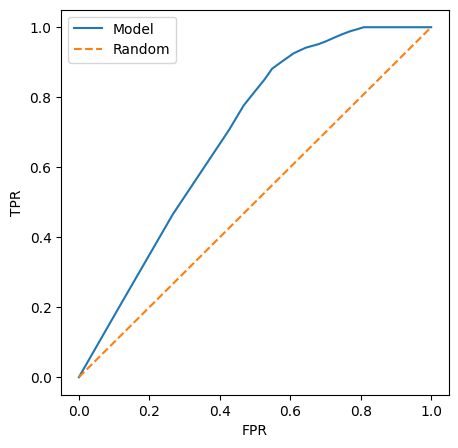

In [124]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## Question 1

In [125]:

auc_scores = []
for feat in numerical:
    score = roc_auc_score(y_train, df_train[feat])
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[feat])
    auc_scores.append((feat,score))
print(auc_scores)

[('year', 0.687551492804683), ('engine_hp', 0.9171031265539011), ('engine_cylinders', 0.766116490165669), ('highway_mpg', 0.6330587871772013), ('city_mpg', 0.6734244643245233)]


In [126]:
max(auc_scores, key=lambda x: x[1])

('engine_hp', 0.9171031265539011)

## Question 2

In [127]:
dv = DictVectorizer()

train_dict = df_train[numerical+categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [128]:
val_dict = df_val[numerical+categorical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
above_average_decision = (y_pred >= 0.5)
(y_val == above_average_decision).mean()

0.931598825010491

In [129]:
auc = round(roc_auc_score(y_val, y_pred),3)
print(f"AUC: {auc}")

AUC: 0.977


## Question 3

In [130]:
thresholds = np.linspace(0, 1, 101)
print(thresholds)
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    p_score = precision_score(y_val, y_pred >= t)
    r_score = recall_score(y_val, y_pred >= t)
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    score = (t, score, p_score, r_score, tp, fp, fn, tn) 
    scores.append(score)

columns = ['threshold', 'accuracy', 'precision', 'recall', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores[::10]

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


/Users/k.shilovskiy/Development/ReplyProjects/porsche/jupyter/venv-3.11.2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,accuracy,precision,recall,tp,fp,fn,tn
0,0.0,0.274444,0.274444,1.000000,654,1729,0,0
10,0.1,0.850608,0.650810,0.983180,643,345,11,1384
20,0.2,0.895090,0.740476,0.951070,622,218,32,1511
30,0.3,0.913135,0.792157,0.926606,606,159,48,1570
40,0.4,0.926563,0.843615,0.899083,588,109,66,1620
50,0.5,0.931599,0.881804,0.866972,567,76,87,1653
60,0.6,0.924045,0.914186,0.798165,522,49,132,1680
70,0.7,0.916072,0.931559,0.749235,490,36,164,1693
80,0.8,0.903063,0.962801,0.672783,440,17,214,1712
90,0.9,0.869492,0.988604,0.530581,347,4,307,1725


In [131]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [132]:
idx = np.argwhere(np.diff(np.sign(df_scores['precision'] - df_scores['recall']))).flatten()
idx

array([48, 99])

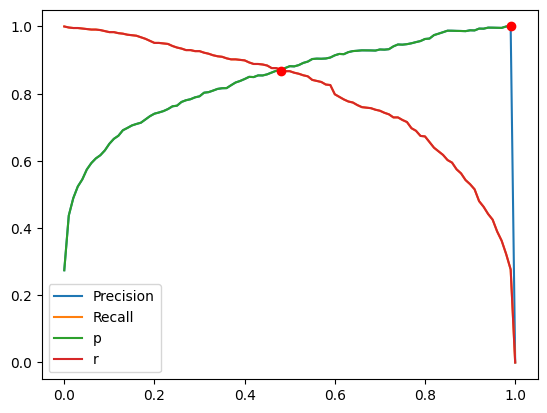

In [133]:
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.plot(df_scores.threshold, df_scores['p'], label='p')
plt.plot(df_scores.threshold, df_scores['r'], label='r')

plt.plot(df_scores.threshold[idx], df_scores['precision'][idx], 'ro')
plt.legend()

In [134]:
print(f"Intersection point: {thresholds[idx[0]]}")

Intersection point: 0.48


## Question 4

In [135]:
df_scores['f1'] =  2 * df_scores['precision'] * df_scores['recall'] / (df_scores['precision'] + df_scores['recall'])
df_scores[::10]

,threshold,accuracy,precision,recall,tp,fp,fn,tn,p,r,f1
0,0.0,0.274444,0.274444,1.000000,654,1729,0,0,0.274444,1.000000,0.430688
10,0.1,0.850608,0.650810,0.983180,643,345,11,1384,0.650810,0.983180,0.783191
20,0.2,0.895090,0.740476,0.951070,622,218,32,1511,0.740476,0.951070,0.832664
30,0.3,0.913135,0.792157,0.926606,606,159,48,1570,0.792157,0.926606,0.854123
40,0.4,0.926563,0.843615,0.899083,588,109,66,1620,0.843615,0.899083,0.870466
50,0.5,0.931599,0.881804,0.866972,567,76,87,1653,0.881804,0.866972,0.874325
60,0.6,0.924045,0.914186,0.798165,522,49,132,1680,0.914186,0.798165,0.852245
70,0.7,0.916072,0.931559,0.749235,490,36,164,1693,0.931559,0.749235,0.830508
80,0.8,0.903063,0.962801,0.672783,440,17,214,1712,0.962801,0.672783,0.792079
90,0.9,0.869492,0.988604,0.530581,347,4,307,1725,0.988604,0.530581,0.690547


In [136]:
df_scores['f1_manual'] = 2 * df_scores['p'] * df_scores['r'] / (df_scores['p'] + df_scores['r'])

In [144]:
df_scores.loc[df_scores['f1'].argmax()]

threshold       0.500000
accuracy        0.931599
precision       0.881804
recall          0.866972
tp            567.000000
fp             76.000000
fn             87.000000
tn           1653.000000
p               0.881804
r               0.866972
f1              0.874325
f1_manual       0.874325
Name: 50, dtype: float64

In [138]:
df_scores.iloc[[49,50,51,52]]

,threshold,accuracy,precision,recall,tp,fp,fn,tn,p,r,f1,f1_manual
49,0.49,0.929920,0.876352,0.866972,567,80,87,1649,0.876352,0.866972,0.871637,0.871637
50,0.50,0.931599,0.881804,0.866972,567,76,87,1653,0.881804,0.866972,0.874325,0.874325
51,0.51,0.930340,0.881250,0.862385,564,76,90,1653,0.881250,0.862385,0.871716,0.871716
52,0.52,0.930760,0.885039,0.859327,562,73,92,1656,0.885039,0.859327,0.871994,0.871994


## Question 5

In [139]:
from tqdm import tqdm

In [140]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical+numerical].to_dict(orient='records')

    dv = DictVectorizer()
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [141]:
def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [142]:
n_splits = 5
C = 1.0

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1.0 0.978 +- 0.001


## Question 6

In [143]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 25%|████████████████████████████████████                                                                                                            | 1/4 [00:00<00:01,  1.72it/s]

C=0.01 0.952 +- 0.003


 50%|████████████████████████████████████████████████████████████████████████                                                                        | 2/4 [00:01<00:01,  1.69it/s]

C=0.1 0.972 +- 0.002


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 3/4 [00:01<00:00,  1.68it/s]

C=0.5 0.977 +- 0.001


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]

C=10 0.980 +- 0.003
